## HW 4
### Plotting and examining subsets of data </br> </br> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
%matplotlib inline 

### Problem 0: Some fake data to mess with. 

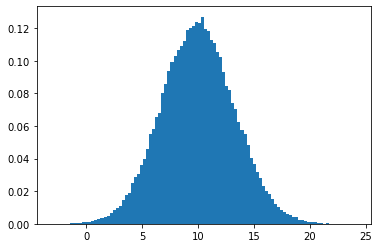

In [2]:
t = np.linspace(0,np.pi*100,int(1e5))
N = 10+ np.sin(t)
bkgd = stats.norm.rvs(size=int(1e5))*np.sqrt(N)+N
a=plt.hist(bkgd,bins=100,density=True)

#### Problem 1: Subsets of Data 

The idea here is to plot small portions of the data. In python this is often called array slicing, but in other languages it has no special terminology. Your goal is to figure out how to make the following plots:

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

<b> 1a) </b>

Text(0.5, 1.0, 'First 1000 Points')

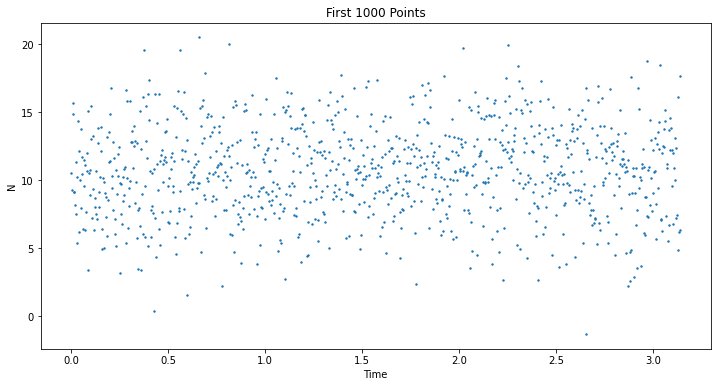

In [3]:
fig,ax=plt.subplots(figsize=(12,6))
x=t[:1000]
data=bkgd[:1000]
scatter=ax.scatter(x,data,s=2)
ax.set_xlabel("Time")
ax.set_ylabel("N")
ax.set_title("First 1000 Points")

<b> 1b) </b> 

In [4]:
def Scatter(start,X):
    end=start+X
    x=t[start:end]
    data=bkgd[start:end]
    return [x,data]

Text(0.5, 1.0, '20 to 2220')

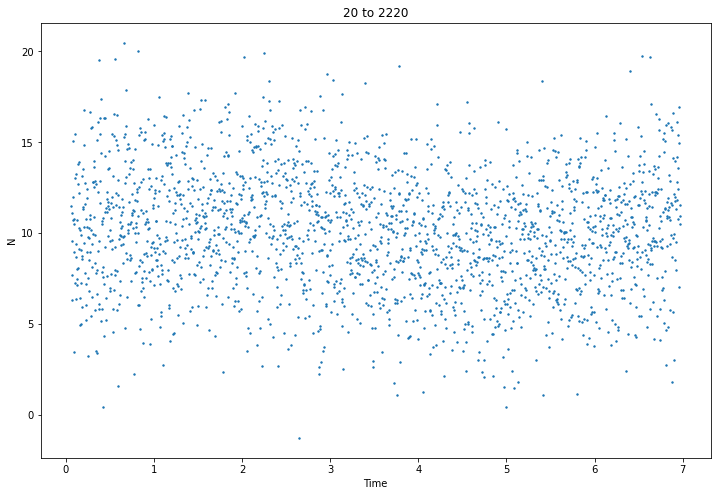

In [6]:
fig,ax=plt.subplots(figsize=(12,8))
start=20
X=2200
scatter=ax.scatter(Scatter(start,X)[0],Scatter(start,X)[1],s=2)
ax.set_xlabel("Time")
ax.set_ylabel("N")
ax.set_title(f'{start} to {start+X}')


<b> 1c) </b> 1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

Text(0.5, 1.0, 'Steps of 100')

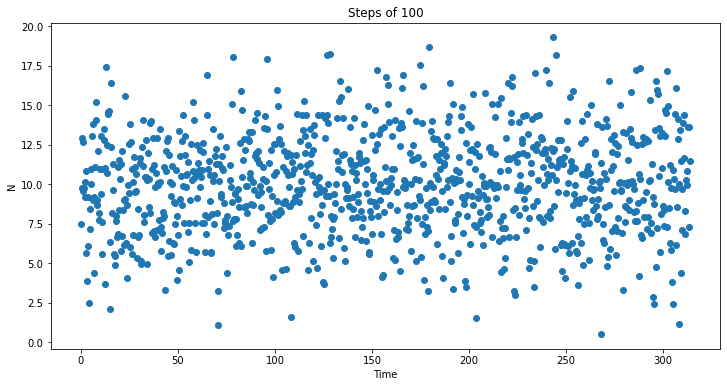

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
x=t[::100]
data=bkgd[::100]
scatter=ax.scatter(t[::100],bkgd[::100])
ax.set_xlabel("Time")
ax.set_ylabel("N")
ax.set_title("Steps of 100")

### Problem 2: Density 

Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

<b> 2a) </b> 

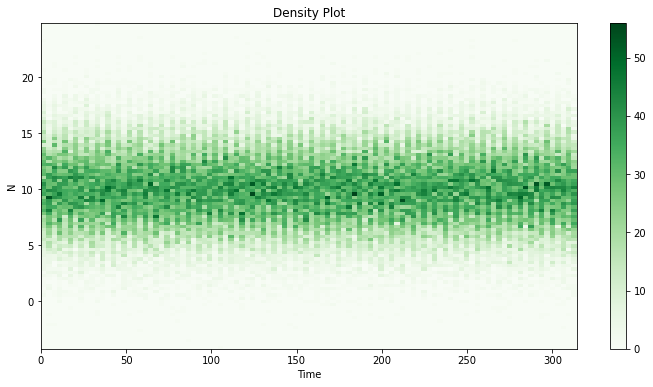

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
x=t
data=bkgd
density=ax.hist2d(x,data,bins=100,cmap="Greens")
ax.set_xlabel("Time")
ax.set_ylabel("N")
ax.set_title("Density Plot")
fig.colorbar(density[3], ax=ax)

<b> 2b) </b> <br>
The plot shows the number density of N vs t in the data we created. As referenced in the colorbar, the lightest shade of green (almost white) corresponds to the highest number density of N while the darkest shade corresponds to least density. This means that N is more likely to have points in the light-green bins and vice-versa. 

### Problem 3: Folding 
Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of  2π  (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.) <br>
3b) Make a 2D histogram plot of your folded data.

Optional, but very fun and useful: <br>
3c) You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded variable. You can then overplot this on 3b to show the average as a function of folded time.

Text(0, 0.5, 'N')

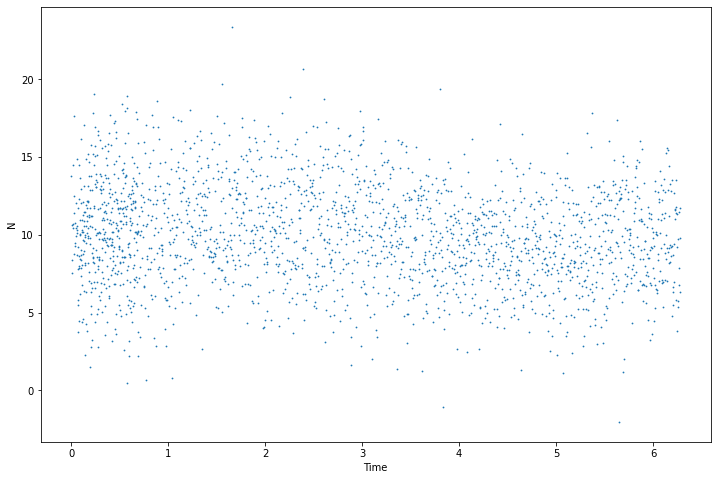

In [15]:
phases=t%(2*np.pi)

fig,ax=plt.subplots(figsize=(12,8))
scatter=ax.scatter(phases[20:2220],bkgd[20:2220],s=0.6)
ax.set_xlabel("Time")
ax.set_ylabel("N")



<b> 3b) </b> 

Text(0, 0.5, 'N')

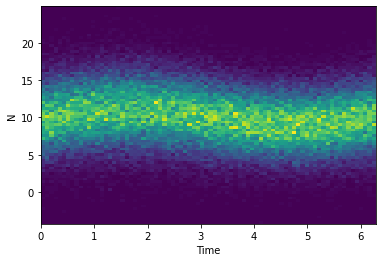

In [22]:
fig,ax = plt.subplots()
scatter=ax.hist2d(phases,bkgd,bins=80)
ax.set_xlabel("Time")
ax.set_ylabel("N")
